<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=b><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=b><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color= b><font size=5> I.F. Patricio Díaz </font> <br> <br>

<center><font color=b><font size=5> I.F. Sofía García </font> <br> <br>
    
<center><font color=b><font size=5> I.F. Marta Martínez </font> <br> <br>
    
<center><font color=b><font size=5> I.F. Kiara Puente </font> <br> <br>
   
<center> <font color= b> <font size = 4> Mayo 2021 </a> | <font color= b> <font size = 4> Repositorio: <a href='https://github.com/Sofiagarciaif/myst_proyecto_e2'>Link</a></font>

<br>

<center> <font color=orange > <font size = 7> PROYECTO  </font> <br> <br> <font color= b> <font size = 5> Sistemas de Trading </font>

# <font color= "brown"> <font size = 5> Abstract </font>

 <font size = 3> Este documento fue elaborado por Patricio Díaz, Sofía García,Marta Martínez Valero y Kiara Puente como un proyecto final para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se plantea analizar el comunicado de un indicador económico como un evento que puede generar patrones temporales en las reacciones del precio de un activo financiero. Con estas reacciones del precio, se busca detectar patrones y utilizarlos para construir un sistema de trading. </font> 

<br>

# <font color= "brown" > <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid orange"> </hr>

# <font color= orange> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0

In [1]:
import data as dt 
import visualizations as vs
import functions as fn 

# <font color= orange> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

<br>

# <font color= "brown"> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid orange"> </hr>

Un trader es todo aquel inversor que opera en los mercados financieros con la finalidad de obtener beneficios en el corto, medio o largo plazo, lo anterior lo logra mediante análisis técnico o fundamental.

Por otro lado, sabemos que existen diferentes tipos de trading: trading discrecional y su contrario, el trading algoritmico.
El trading discrecional es la operación basada en el propio criterio e intuición del trader sin unas reglas a seguir de forma sistemática. Por esto se dice que es lo contrario al trading algorítmico.

El trading algorítmico se basa en crear algoritmos que nos permitan detectar oportunidades para tener mejores beneficios. Los algoritmos se crean en función de las condiciones del mercado, el tipo de accion, mercados, entre otros, para detectar la mejor estrategia para obtener un mayor rendimiento, todo lo anterior sin la influencia de los sentimientos del ser humano como lo es el miedo a perder o el gusto de ganar. 


<br>

# <font color= brown> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid orange"> </hr>

El presente proyecto tiene como objetivo analizar el comunicado de un indicador económico **Purchasing Manager Index (PMI)** como un evento que puede generar patrones temporales en las reacciones del precio de un activo financiero: **USD Y GBP**. Con estas reacciones del precio, se busca detectar patrones y utilizarlos para construir un sistema de trading.

<br>

# <font color= brown> <font size = 6> 3. Datos </font>

<hr style="border:0.02in solid orange"> </hr>

#### <font color= a05000 >IMPORTAMOS LOS DATOS DEL PMI (PURCHASING MANAGER INDEX) 

In [2]:
PMI = dt.f_import_pmi()

In [3]:
PMI.head(5)

,Actual,Prevision,Anterior
Fecha y hora,,,
2021-04-07 10:30:00,56.3,56.8,49.5
2021-03-24 11:30:00,56.8,51.0,49.5
2021-03-03 11:30:00,49.5,49.7,39.5
2021-02-19 11:30:00,49.7,41.0,39.5
2021-02-03 11:30:00,39.5,38.8,38.8


In [4]:
PMI.tail(5)

,Actual,Prevision,Anterior
Fecha y hora,,,
2019-09-04 10:30:00,50.6,51.0,51.4
2019-08-05 10:30:00,51.4,50.4,50.2
2019-07-03 10:30:00,50.2,51.0,51.0
2019-06-05 10:30:00,51.0,50.6,50.4
2019-05-03 10:30:00,50.4,50.4,48.9


#### <font color= a05000 >IMPORTAMOS LOS DATOS HISTÓRICOS DEL GBP/USD DE CADA MINUTO

In [5]:
PRECIOSGBP = dt.f_import_precios()

In [6]:
PRECIOSGBP.head(5)

,Open,High,Low,Close
Fecha y hora,,,,
2019-01-01 17:06:00,1.27459,1.27459,1.27250,1.27250
2019-01-01 17:11:00,1.27227,1.27227,1.27227,1.27227
2019-01-01 17:12:00,1.27294,1.27294,1.27294,1.27294
2019-01-01 17:13:00,1.27294,1.27295,1.27294,1.27295
2019-01-01 17:14:00,1.27295,1.27295,1.27277,1.27277


In [7]:
PRECIOSGBP.tail(5)

,Open,High,Low,Close
Fecha y hora,,,,
2021-04-30 16:54:00,1.38126,1.38126,1.38123,1.38123
2021-04-30 16:55:00,1.38125,1.38150,1.38125,1.38143
2021-04-30 16:56:00,1.38143,1.38166,1.38122,1.38123
2021-04-30 16:57:00,1.38122,1.38179,1.38120,1.38121
2021-04-30 16:58:00,1.38107,1.38192,1.38103,1.38106


# <font color= brown> <font size = 6> 4. Procesos </font>

<hr style="border:0.02in solid orange"> </hr>

# <font color= darkgoldenrod> <font size = 5 > Etapa 2 - Datos Históricos</font>

# <font color= orange> <font size = 4 > Aspectos financieros</font>


Reino Unido - Índice PMI para el sector de servicios. El índice de gerentes de compras del “Chartered Institute of Purchasing and Supply (CIPS)”  lo que hace es medir el nivel de actividad de los gerentes de compras en el sector de servicios. Cualquier valor que se encuentre por encima de 50 nos indica una expansión, mientras que un valor que se encuentre por debajo de 50 nos indica una disminución. Esto nos proporciona una indicación de la salud de la industria de servicios en el Reino Unido. Los comerciantes lo que hacen es monitorear de cerca las encuestas, ya que los compradores generalmente tienen un fácil acceso a los datos sobre el desempeño que tienen sus empresa, lo que esto puede llegar a ser un indicador de los resultados macroeconómicos. Con un valor superior al que esta esperado debería considerarse positivo o alcista para la GBP, pero por otro lado que un valor sea inferior al esperado esto se considerá negativo y bajista para la GBP.

# <font color= sandybrown> <font size = 3 > VALIDACION VISUAL 1</font>

In [8]:
FechaPMI=PMI['Actual']== 47.6
PMI_EJ1 = PMI[FechaPMI]
PMI_EJ1

,Actual,Prevision,Anterior
Fecha y hora,,,
2020-12-03 11:30:00,47.6,45.8,51.4


<img src="files/3 de diciembre de 2020.PNG" style="width:600px;">

En el día 3 de Diciembre del 2020 el indicador supero las expectativas que se tenian ya que llego a 47.6 ya que se tenia esperado que llegara a 45.8

In [2]:
fecha, tipo = "2020-12-03 11:30", 'venta'
inicial,final = 1.3499, 1.3490
maxi, mini = 1.3500,1.3477
profit, loss = 20, 10
volumen = 200

fn.operacion(p_inicial=inicial, p_final=final, p_max=maxi,p_min=mini, tipo=tipo, t_profit=profit, s_loss=loss, fecha_hora=fecha)

NameError: name 'fn' is not defined

# <font color= sandybrown> <font size = 3 > VALIDACION VISUAL 2</font>

In [10]:
FechaPMI=PMI['Actual']== 49.7
PMI_EJ2 = PMI[FechaPMI]
PMI_EJ2

,Actual,Prevision,Anterior
Fecha y hora,,,
2021-02-19 11:30:00,49.7,41.0,39.5


<img src="files/19 de febrero 2021.PNG" style="width:600px;">

El indicador se ubicó en 49.7 en febrero del 2021 a la alza, con lo que superó en 8.7 a lo que se tenia esperado(41)

In [11]:
fecha, tipo = "2021-02-19 11:30", 'venta'
inicial,final = 1.4012, 1.4023
maxi, mini = 1.4027,1.4008
profit, loss = 20, 10
volumen = 200

fn.operacion(p_inicial=inicial, p_final=final, p_max=maxi,p_min=mini, tipo=tipo, t_profit=profit, s_loss=loss, fecha_hora=fecha)

,Concepto,Valor
0,DateTime,2020-12-03 11:30
1,Ventana,30 min
2,Precio inicial,1.11405
3,Precio Final,1.11294
4,Precio Max,1.11405
5,Precio Min,1.11254
6,Stop loss,1.11505
7,Take profit,1.11205
8,Volumen,897
9,Capital,1000 USD


# <font color= sandybrown> <font size = 3 > VALIDACION VISUAL 3</font>

In [12]:
FechaPMI=PMI['Actual']== 55.1
PMI_EJ3 = PMI[FechaPMI]
PMI_EJ3

,Actual,Prevision,Anterior
Fecha y hora,,,
2020-09-23 10:30:00,55.1,56.0,58.8


<img src="files/23 de septiembre 2020.PNG" style="width:600px;">

En el día 23 de Septiembre del 2020 el indicador bajó a 55.1 y se tenia previsto llegar a 56.0

In [13]:
fecha, tipo = "2020-09-23 10:30", 'venta'
inicial,final = 1.2718, 1.2738
maxi, mini = 1.2739,1.2708
profit, loss = 20, 10
volumen = 200

fn.operacion(p_inicial=inicial, p_final=final, p_max=maxi,p_min=mini, tipo=tipo, t_profit=profit, s_loss=loss, fecha_hora=fecha)

,Concepto,Valor
0,DateTime,2020-12-03 11:30
1,Ventana,30 min
2,Precio inicial,1.11405
3,Precio Final,1.11294
4,Precio Max,1.11405
5,Precio Min,1.11254
6,Stop loss,1.11505
7,Take profit,1.11205
8,Volumen,897
9,Capital,1000 USD


# <font color= sandybrown> <font size = 3 > VALIDACION VISUAL 4</font>

In [14]:
FechaPMI=PMI['Actual']== 39.5
PMI_EJ4 = PMI[FechaPMI]
PMI_EJ4

,Actual,Prevision,Anterior
Fecha y hora,,,
2021-02-03 11:30:00,39.5,38.8,38.8


<img src="files/3 de febrero de 2021.PNG" style="width:600px;">

En el día 3 de febrero del 2021 el indicador se ubico en 39.5 por lo que supero las expectativas que se tenian ya que se creía que llegaría a 38.8


In [15]:
fecha, tipo = "2020-02-03 11:30", 'venta'
inicial,final = 1.3013, 1.3004
maxi, mini = 1.3016,1.3000
profit, loss = 20, 10
volumen = 200

fn.operacion(p_inicial=inicial, p_final=final, p_max=maxi,p_min=mini, tipo=tipo, t_profit=profit, s_loss=loss, fecha_hora=fecha)

,Concepto,Valor
0,DateTime,2020-12-03 11:30
1,Ventana,30 min
2,Precio inicial,1.11405
3,Precio Final,1.11294
4,Precio Max,1.11405
5,Precio Min,1.11254
6,Stop loss,1.11505
7,Take profit,1.11205
8,Volumen,897
9,Capital,1000 USD


# <font color= sandybrown> <font size = 3 > VALIDACION VISUAL 5</font>

In [16]:
FechaPMI=PMI['Actual']== 34.5
PMI_EJ5 = PMI[FechaPMI]
PMI_EJ5

,Actual,Prevision,Anterior
Fecha y hora,,,
2020-04-03 10:30:00,34.5,34.8,53.2


<img src="files/3-abril-2020.PNG" style="width:600px;">

En el día 3 de Abril del 2020 el indicador bajo .3 y llegó a 34.5 y se tenia previsto llegar a 34.8

In [17]:
fecha, tipo = "2020-04-03 10:30", 'venta'
inicial,final = 1.2257, 1.2223
maxi, mini = 1.2257,1.2207
profit, loss = 20, 10
volumen = 200

fn.operacion(p_inicial=inicial, p_final=final, p_max=maxi,p_min=mini, tipo=tipo, t_profit=profit, s_loss=loss, fecha_hora=fecha)

,Concepto,Valor
0,DateTime,2020-12-03 11:30
1,Ventana,30 min
2,Precio inicial,1.11405
3,Precio Final,1.11294
4,Precio Max,1.11405
5,Precio Min,1.11254
6,Stop loss,1.11505
7,Take profit,1.11205
8,Volumen,897
9,Capital,1000 USD


# <font color= orange> <font size = 4 > Aspectos estadísticos</font>

Con los datos del indicador escogido por el equipo se buscara la serie de tiempo del valor actual y caracterización econométrica:

#### <font color= a05000 > PRIMERO REALIZAMOS UNA GRÁFICA DEL HISTÓRICO DESCARGADO PREVIAMENTE DEL IPC, PARA VISUALIZAR LOS DATOS

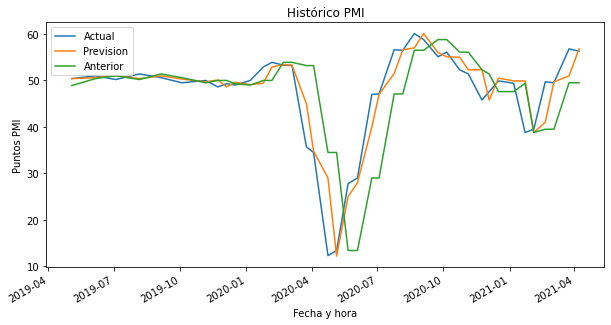

In [18]:
vs.f_grafica_hist(PMI)

#### <font color= a05000 > A LOS DATOS LE REALIZAMOS UNA AUTOCORRELACIÓN Y UNA CORRELACIÓN PARCIAL, EN LAS CUALES PODEMOS OBSERVAR QUE TIENE UN COMPONENTE DE AUTOCORRELACIÓN DE 5 Y UN COMPONENTE DE AUTOCORRELACIÓN PARCIAL IGUAL A 1

C:\Users\mamarta\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

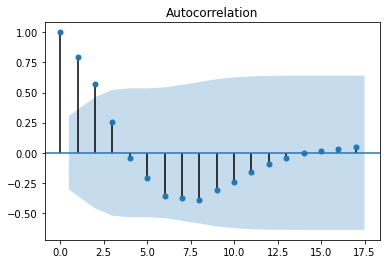

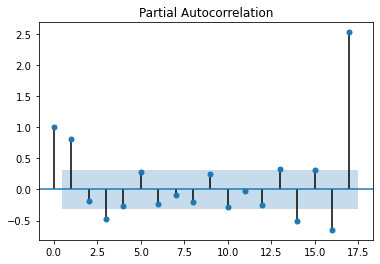

In [19]:
vs.f_autocorr(PMI["Actual"])

#### <font color= a05000 > SE HIZO UNA PRUEBA DE HETEROCEDASTICIDAD PARA DETERMINAR .....

#### <font color= a05000 > SE REALIZA UNA PRUEBA DE NORMALIDAD A LOS DATOS PARA VER SI CONTAMOS CON UNA DISTRIBUCIÓN NORMAL Y PODEMOS VER YA QUE NOS DA UN P-VALUE MAYOR A 0.5 POR LO TANTO NO ES NORMAL 

In [20]:
vs.f_dist_normal(PMI["Actual"])

No es normal


#### <font color= a05000 > VEMOS SI LA SERIE PRESENTA UNA ESCIONALIDAD

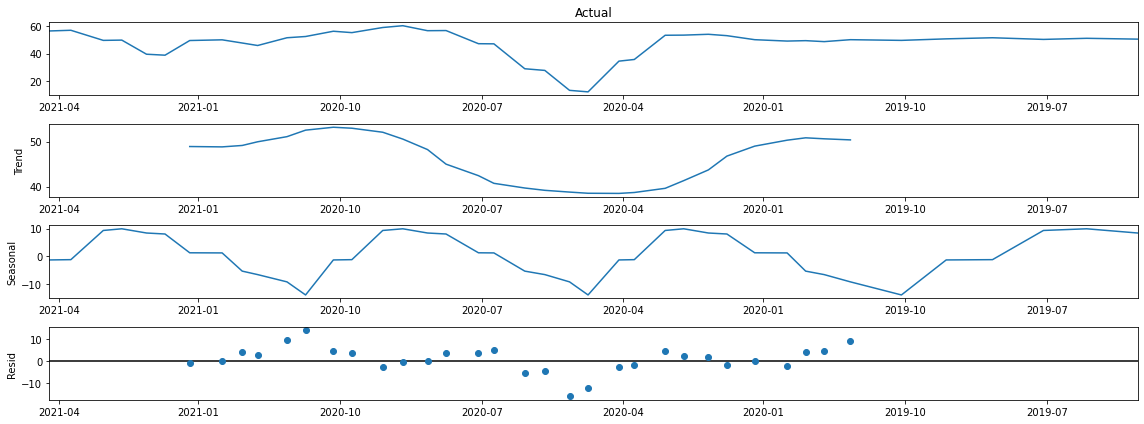

In [21]:
vs.f_estacionalidad(PMI["Actual"])

#### <font color= a05000 > EVALUAMOS SI LA SERIE ES ESTACIONARIA MEDIANTE UN TEST DE DICKEY-FULLER

In [22]:
vs.f_estacionariedad(PMI["Actual"])

No es estacionaria


#### <font color= a05000 > HICIMOS UNA GRÁFICA BOX PLOT PARA VER SI EXITÍAN DATOS ATÍPICOS Y DETECTARLOS

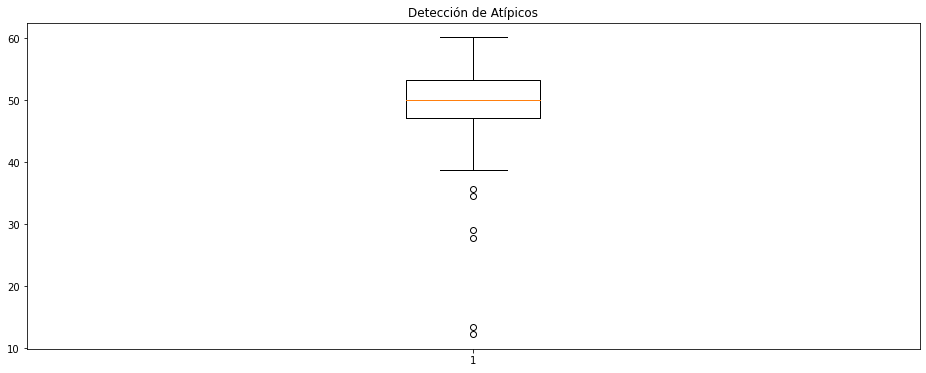

In [23]:
vs.f_atipicos(PMI["Actual"])

CONCLUSION ASPECTOS ESTADISTICOS.....

# <font color= orange> <font size = 4 > Aspectos computacionales</font>

#### <font color= a05000 > SE DESCARGARON LOS PRECIOS HISTORICOS

Se descargaron los precios del GBD/USD 30 minutos antes y después de que se publicara el indicador PMI.

In [24]:
fn.escenarios_tabla().drop(['Posicion', 'Take profit (pips)', 'Stop loss (pips)', 'Capital (USD)'], axis=1)

,Regla
Escenario,
A,Actual >= Consensus >= Previous
B,Actual >= Consensus < Previous
C,Actual < Consensus >= Previous
D,Actual <Consensus < Previous


#### <font color= a05000 >  HICIMOS LA CLASIFICACION DE ESCENARIOS DE OCURRECIA

In [4]:
<img src="files/CLASIFI.png" style="width:600px;">

SyntaxError: invalid syntax (<ipython-input-4-e1afa2e5805b>, line 1)

In [25]:
data = fn.f_escenario(PMI)
data.head()

,Actual,Prevision,Anterior,Escenario
Fecha y hora,,,,
2021-04-07 10:30:00,56.3,56.8,49.5,C
2021-03-24 11:30:00,56.8,51.0,49.5,A
2021-03-03 11:30:00,49.5,49.7,39.5,C
2021-02-19 11:30:00,49.7,41.0,39.5,A
2021-02-03 11:30:00,39.5,38.8,38.8,A


#### <font color= a05000 > SE CALCULARON LAS SIGUIENTES 4 METRICAS:

1.- (Dirección)

2.- (Pips Alcistas)

3.- (Pips Bajistas)

4.- (Volatilidad)

In [26]:
metrica=fn.f_metricas(PMI,PRECIOSGBP)
metrica.head()

,Actual,Prevision,Anterior,Escenario,Direccion,Pips Alcistas,Pips Bajistas,Volatilidad
Fecha y hora,,,,,,,,
2021-04-07 10:30:00,56.3,56.8,49.5,C,-1,-0.06502,0.06969,0.00595
2021-03-24 11:30:00,56.8,51.0,49.5,A,-1,-0.06069,0.06536,0.00144
2021-03-03 11:30:00,49.5,49.7,39.5,C,-1,-0.08661,0.09128,0.00173
2021-02-19 11:30:00,49.7,41.0,39.5,A,-1,-0.08973,0.09440,0.00175
2021-02-03 11:30:00,39.5,38.8,38.8,A,-1,-0.05290,0.05757,0.00155


In [27]:
metrica.tail()

,Actual,Prevision,Anterior,Escenario,Direccion,Pips Alcistas,Pips Bajistas,Volatilidad
Fecha y hora,,,,,,,,
2019-09-04 10:30:00,50.6,51.0,51.4,D,1,0.09313,-0.08846,0.00372
2019-08-05 10:30:00,51.4,50.4,50.2,A,1,0.09543,-0.09076,0.00317
2019-07-03 10:30:00,50.2,51.0,51.0,C,1,0.05466,-0.04999,0.00271
2019-06-05 10:30:00,51.0,50.6,50.4,A,1,0.03942,-0.03475,0.00226
2019-05-03 10:30:00,50.4,50.4,48.9,A,1,0.00424,0.00043,0.00708


# <font color= darkgoldenrod> <font size = 5 > Etapa 3 - Programación</font>

# <font color= darkgoldenrod> <font size = 5 > Etapa 4 - Optimización y Backtest</font>

1. Capital inicial: 100000
2. Riesgo máximo por operación (pérdida máximo): 1,000 usd
3. Divide los datos de la siguiente manera:  
- Periodo de entrenamiento: 01/ene/2018 - 01/ene/2019 \n
- Periodo de prueba: 01/Feb/2019 - 01/Feb/2020


#### <font color= a05000 > SE REALIZA UN NUEVO DATA FRAME REACOMODANDO LO ANTERIOR

In [ ]:
df_escenarios = f_escenarios(pmi)
df_escenarios.head()

#### <font color= a05000 >

In [ ]:
operacion= ['venta', 'venta', 'compra','compra']
sl= [10,10,5,5]
tp=[20,20,10,10]
volumen= [500000, 500000, 500000, 500000]
df_decisiones = fn.f_decisiones(operacion, sl,tp,volumen)
df_decisiones

#### <font color= a05000 >

<br>

# <font color= brown> <font size = 6> 5. Conclusiones </font>

<hr style="border:0.02in solid orange"> </hr>

In [2]:
# en esta seccion es opcional incluir algun codigo para mostrar
# visualmente algun concepto o hallazgo relevante como conclusion

In [3]:
# En esta sección es opcional incluir código para mostrar/visualizar
# los datos con los que se trabajó en el laboratorio

<br>